<a href="https://colab.research.google.com/github/patricktapajos/numpy/blob/main/notebooks/Warm_Up_Manipulando_Arquivos_e_Listas_em_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Warm Up - Manipulando Arquivos e Listas com Python

**Disciplina**: Programação para Ciência dos Dados  
**Docentes**: Elloá B. Guedes e Tiago E. de Melo  
**Contato:** ebgcosta@uea.edu.br, tmelo@uea.edu.br  
**Github:** http://github.com/elloa/numpy

## Apresentação

Para consolidar o aprendizado da manipulação de arquivos e listas com Python, vamos realizar a atividade prática a seguir, a qual consiste em descobrir informações a respeito dos últimos sorteios da Mega-Sena. Você deve abrir o arquivo que encontra-se no diretorio '../data' intitulado _megasena.txt_. Este arquivo texto contém todos os sorteios da Mega-Sena, em que cada linha contém as seis dezenas correspondentes a um sorteio, separadas por um espaço.

## Referências

1. Fonte de dados: https://asloterias.com.br/download-todos-resultados-mega-sena

In [101]:
## Reservado para importação de bibliotecas, se for o caso
import numpy as np
import math
import matplotlib.pyplot as plt
from functools import reduce

### Passo 1 - Abrir o arquivo e organizar as informações em uma lista

1. Abra o arquivo indicado no enunciado do exercício
2. Itere pelas linhas do arquivo e:  
    2.1 Obtenha as dezenas sob a forma de inteiros  
    2.2 Armazene cada sorteio em uma lista  
3. Crie uma lista que contém todos os sorteios

In [102]:
# 1.Abra o arquivo indicado no enunciado do exercício

lottery = np.loadtxt('/content/megasena.txt')
print(lottery)

[[12. 54. 57. 21. 29. 56.]
 [17. 50. 48. 20.  3.  7.]
 [44. 43. 25. 18. 27. 22.]
 ...
 [36. 30. 10. 11. 29. 47.]
 [ 9. 39. 37. 49. 43. 41.]
 [41.  5.  4. 52. 30. 33.]]


In [103]:
#Itere pelas linhas do arquivo e:
# 2.1 Obtenha as dezenas sob a forma de inteiros
lottery_as_int = lottery.astype(int)

# 2.2 Armazene cada sorteio em uma lista
lottery_list = lottery_as_int.tolist()
lottery_list[0:5]


[[12, 54, 57, 21, 29, 56],
 [17, 50, 48, 20, 3, 7],
 [44, 43, 25, 18, 27, 22],
 [18, 36, 47, 52, 35, 17],
 [37, 39, 21, 9, 54, 43]]

### Passo 2 - Sobre os Sorteios

1. Quantos sorteios foram realizados até a presente data?
2. Quantas vezes cada dezena foi sorteada?
  - Dica: Use um dicionário!
3. Quantas vezes o número 51 foi sorteado?
4. Quantas vezes números no intervalo [1,10] foram sorteados?
5. Qual a dezena mais sorteada?  
6. Qual a dezena menos sorteada?  

In [ ]:
# 2.1.Quantos sorteios foram realizados até a presente data?
print('Foram realizados %d sorteios até o momento.' % len(lottery_list))

Foram realizados 2304 sorteios até o momento.


In [ ]:
# 2.2.Quantas vezes cada dezena foi sorteada?
unique, counts = np.unique(lottery_list, return_counts=True)
d_lottery = dict(zip(unique, counts))
print(d_lottery)

{1: 230, 2: 235, 3: 207, 4: 251, 5: 255, 6: 237, 7: 219, 8: 230, 9: 211, 10: 263, 11: 234, 12: 228, 13: 234, 14: 219, 15: 206, 16: 237, 17: 239, 18: 234, 19: 216, 20: 222, 21: 203, 22: 201, 23: 254, 24: 245, 25: 213, 26: 190, 27: 247, 28: 242, 29: 237, 30: 242, 31: 218, 32: 235, 33: 251, 34: 242, 35: 236, 36: 239, 37: 248, 38: 232, 39: 216, 40: 223, 41: 238, 42: 248, 43: 241, 44: 239, 45: 225, 46: 227, 47: 223, 48: 209, 49: 230, 50: 232, 51: 239, 52: 235, 53: 261, 54: 246, 55: 194, 56: 237, 57: 217, 58: 226, 59: 226, 60: 210}


In [ ]:
# 2.3.Quantas vezes o número 51 foi sorteado?
print('O número 51 foi sorteado %d vezes.' % d_lottery[51])

O número 51 foi sorteado 239 vezes.


In [ ]:
# Necessário para as questões restantes
list_values = list(d_lottery.values())
list_keys = list(d_lottery.keys())


In [ ]:
# 2.4. Quantas vezes números no intervalo [1,10] foram sorteados?
# print('Os números no intervalo [1, 10] foram sorteados %d vezes.' % sum({k: d_lottery[k] for k in range(1,11)}.values()))
print('Os números no intervalo [1, 10] foram sorteados %d vezes.' % sum(list_values[0:10]))

Os números no intervalo [1, 10] foram sorteados 2338 vezes.


In [ ]:
# 2.5. Qual a dezena mais sorteada?
max_value = max(list_values)
print('A dezena mais sorteada foi o número %d.' % (list_keys[list_values.index(max_value)]))

A dezena mais sorteada foi o número 10.


In [ ]:
# 2.6. Qual a dezena menos sorteada?
min_value = min(list_values)
print('A dezena menos sorteada foi o número %d.' % (list_keys[list_values.index(min_value)]))

A dezena menos sorteada foi o número 26.


### Passo 3 - Um pouco de Matemática!

1. Usando Python, calcule a probabilidade de alguém acertar a mega-sena
2. Qual a sena mais provável? Tome como base as seis dezenas mais frequentes nos sorteios anteriores
3. Qual a dezena média?  
   3.1 O resultado é compatível com a Lei dos Grandes Números?

In [ ]:
# 3.1 Usando Python, calcule a probabilidade de alguém acertar a mega-sena
# Combinação 
prob = math.factorial(60)/(math.factorial(6)*math.factorial(54))
print("A probabilidade de alguém acertar a mega-sena é de 1 em %d" % prob)

A probabilidade de alguém acertar a mega-sena é de 1 em 50063860


In [ ]:
# 3.2 Qual a sena mais provável? Tome como base as seis dezenas mais frequentes nos sorteios anteriores
new_list = list_values.copy()
new_list.sort(reverse=True)
sena = [list_keys[list_values.index(i)] for i in new_list[0:5]]
print("A sena mais provável, baseando-se nas dezenas mais frequentes, é: ", sena)

A sena mais provável, baseando-se nas dezenas mais frequentes, é:  [10, 53, 5, 23, 4]


In [ ]:
# 3.3 Qual a dezena média?
print(list_keys[29])
dezena_media = sum(list_keys)/len(list_keys)
print('A dezena média é %d.' % (dezena_media))

30
A dezena média é 30.


### Passo 4 - Brincando com a curiosidade

1. Já houve algum sorteio exatamente igual a outro? Isto é, com as mesmas dezenas na mesma ordem?
2. Já houve dois sorteios iguais no tocante às dezenas sorteadas?

In [25]:
# 4.1. Já houve algum sorteio exatamente igual a outro? Isto é, com as mesmas dezenas na mesma ordem?
unq, unq_idx, counts = np.unique(lottery_list, axis=0, return_index=True, return_counts=True)
qtde_iguais = len(unq_idx[counts > 1])
print('Houve %d sorteios exatamente iguais (mesma ordem).' % (qtde_iguais))

Houve 0 sorteios exatamente iguais.


In [151]:
# 4.2. Já houve dois sorteios iguais no tocante às dezenas sorteadas?
lottery_cp = lottery_list.copy()
lottery_cp = np.sort(lottery_cp, axis=1)
lottery_cp = np.sort(lottery_cp, axis=0)
# lottery_cp

unq, unq_idx, counts = np.unique(lottery_cp, axis=0, return_index=True, return_counts=True)
qtde_iguais = len(unq_idx[counts > 1])
print('Houve %d sorteios iguais (mesmos números, independente da ordem).' % (qtde_iguais))

Houve 198 sorteios iguais.


In [24]:
a = [[0, 1, 2], [2, 0, 1], [2, 3, 4], [0, 1, 2]]
reduce(np.array_equal, a)

False

### Passo 5 - Plotando um gráfico!

1. Construa um gráfico do tipo histograma que ilustre o número de vezes que cada dezena foi
sorteada

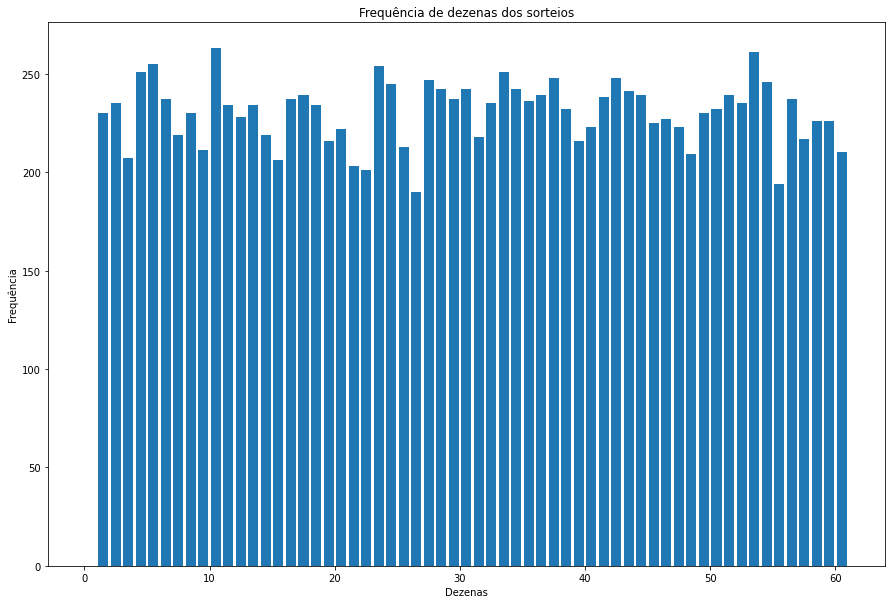

In [ ]:
numbers = [item for sub_list in lottery_list for item in sub_list]
plt.figure(figsize=(15, 10))
plt.title('Frequência de dezenas dos sorteios')
plt.hist(x=numbers, bins=[i for i in range(0, 62)], rwidth=0.8)
plt.xlabel('Dezenas')
plt.ylabel('Frequência')
# plt.grid(True)
plt.show()

#fig, ax = plt.subplots(tight_layout=True)
#hist = ax.hist2d(list_keys, list_values)